In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'), 
                   ['2016_01.csv', '2016_02.csv', '2016_03.csv','2016_04.csv','2016_05.csv','2016_06.csv','2016_07.csv','2016_08.csv','2016_09.csv','2016_10.csv','2016_11.csv','2016_12.csv']))

/tmp/ipykernel_4023/2402189497.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_4023/2402189497.py:1: DtypeWarning: Columns (0,1,3,4,10,11,13,19,20,21,22,30,36,41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_4023/2402189497.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_4023/2402189497.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip'),
/tmp/ipykernel_4023/2402189497.py:1: DtypeWarning: Columns (1,2,3,4,7,10,12,17,20,26,28,30,32,39,41,48) have mixed

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100.0,1057.0,-3.0,0.0,0.0,-1.0,1100-1159,15.0,1112.0,1424.0,8.0,1438.0,1432.0,-6.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,155.0,132.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100.0,1056.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1110.0,1416.0,10.0,1438.0,1426.0,-12.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,150.0,126.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100.0,1055.0,-5.0,0.0,0.0,-1.0,1100-1159,21.0,1116.0,1431.0,14.0,1438.0,1445.0,7.0,7.0,0.0,0.0,1400-1459,0.0,NaN,0.0,158.0,170.0,135.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100.0,1102.0,2.0,2.0,0.0,0.0,1100-1159,13.0,1115.0,1424.0,9.0,1438.0,1433.0,-5.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,151.0,129.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100.0,1240.0,100.0,100.0,1.0,6.0,1100-1159,20.0,1300.0,1617.0,14.0,1438.0,1631.0,113.0,113.0,1.0,7.0,1400-1459,0.0,NaN,0.0,158.0,171.0,137.0,1.0,986.0,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460944,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,1077,15376,1537602,30436,TUS,"Tucson, AZ",AZ,4,Arizona,81,12892,1289204,32575,LAX,"Los Angeles, CA",CA,6,California,91,755.0,747.0,-8.0,0.0,0.0,-1.0,0700-0759,11.0,758.0,807.0,10.0,830.0,817.0,-13.0,0.0,0.0,-1.0,0800-0859,0.0,NaN,0.0,95.0,90.0,69.0,1.0,451.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460945,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,1345,15376,1537602,30436,TUS,"Tucson, AZ",AZ,4,Arizona,81,12892,1289204,32575,LAX,"Los Angeles, CA",CA,6,California,91,1320.0,1325.0,5.0,5.0,0.0,0.0,1300-1359,13.0,1338.0,1351.0,13.0,1355.0,1404.0,9.0,9.0,0.0,0.0,1300-1359,0.0,NaN,0.0,95.0,99.0,73.0,1.0,451.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460946,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,1176,15376,1537602,30436,TUS,"Tucson, AZ",AZ,4,Arizona,81,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,705.0,659.0,-6.0,0.0,0.0,-1.0,0700-0759,9.0,708.0,1051.0,4.0,1125.0,1055.0,-30.0,0.0,0.0,-2.0,1100-1159,0.0,NaN,0.0,200.0,176.0,163.0,1.0,1440.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460947,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,865,15376,15376

                     CRS_DEP_TIME  DEP_DELAY  DEP_DELAY_GROUP  WHEELS_OFF  \
CRS_DEP_TIME             1.000000   0.106199         0.135674    0.931539   
DEP_DELAY                0.106199   1.000000         0.867921    0.136801   
DEP_DELAY_GROUP          0.135674   0.867921         1.000000    0.176484   
WHEELS_OFF               0.931539   0.136801         0.176484    1.000000   
WHEELS_ON                0.640899   0.039986         0.065934    0.684983   
CRS_ARR_TIME             0.681095   0.089228         0.114744    0.701682   
ARR_DELAY                0.098537   0.950558         0.834638    0.133794   
ARR_DELAY_NEW            0.088141   0.966710         0.825687    0.120448   
ARR_DELAY_GROUP          0.121162   0.833889         0.895884    0.165190   
CANCELLED                0.004497   0.010483         0.156199   -0.000994   
DIVERTED                -0.000983   0.002716         0.005733   -0.001114   
CRS_ELAPSED_TIME        -0.018127   0.030013         0.039424   -0.032279   

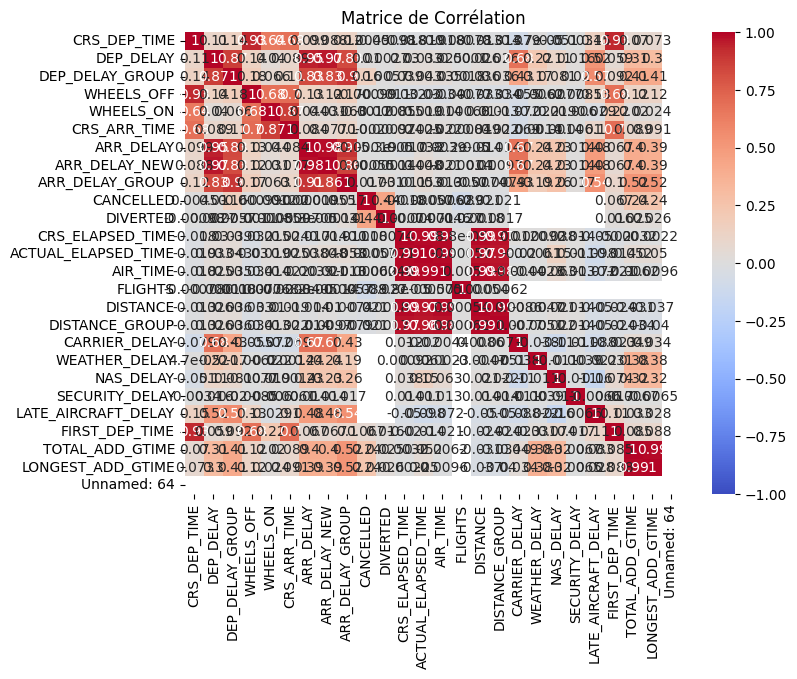

In [5]:
correlation_matrix = df.corr()
print(correlation_matrix)

# Créer une heatmap de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6517491 entries, 0 to 460948
Data columns (total 65 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   object 
 1   QUARTER                object 
 2   MONTH                  object 
 3   DAY_OF_MONTH           object 
 4   DAY_OF_WEEK            object 
 5   FL_DATE                object 
 6   UNIQUE_CARRIER         object 
 7   AIRLINE_ID             object 
 8   CARRIER                object 
 9   TAIL_NUM               object 
 10  FL_NUM                 object 
 11  ORIGIN_AIRPORT_ID      object 
 12  ORIGIN_AIRPORT_SEQ_ID  object 
 13  ORIGIN_CITY_MARKET_ID  object 
 14  ORIGIN                 object 
 15  ORIGIN_CITY_NAME       object 
 16  ORIGIN_STATE_ABR       object 
 17  ORIGIN_STATE_FIPS      object 
 18  ORIGIN_STATE_NM        object 
 19  ORIGIN_WAC             object 
 20  DEST_AIRPORT_ID        object 
 21  DEST_AIRPORT_SEQ_ID    object 
 22  DEST_CITY_MARKET_ID

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# print(df.isnull().sum())

In [9]:
pd.reset_option('display.max_rows')

In [10]:
values_to_remove = {'SP"', 'EV', 36, 1746}
df = df[~df['DAY_OF_MONTH'].apply(lambda x: isinstance(x, str) or x in values_to_remove)]

# Affichage du DataFrame nettoyé
print("\nDataFrame après suppression des valeurs string et des valeurs spécifiques 'SP\"', 'EV', 36 et 1746:")
print(df)


DataFrame après suppression des valeurs string et des valeurs spécifiques 'SP"', 'EV', 36 et 1746:
        YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK     FL_DATE  \
0       2016       1     1            6           3  2016-01-06   
1       2016       1     1            7           4  2016-01-07   
2       2016       1     1            8           5  2016-01-08   
3       2016       1     1            9           6  2016-01-09   
4       2016       1     1           10           7  2016-01-10   
...      ...     ...   ...          ...         ...         ...   
460944  2016       4    12           31           6  2016-12-31   
460945  2016       4    12           31           6  2016-12-31   
460946  2016       4    12           31           6  2016-12-31   
460947  2016       4    12           31           6  2016-12-31   
460948  2016       4    12           31           6  2016-12-31   

       UNIQUE_CARRIER AIRLINE_ID CARRIER TAIL_NUM FL_NUM ORIGIN_AIRPORT_ID  \
0                

In [11]:
df['MONTH'] = df['MONTH'].replace('9', '')

# Remplace 10.0 par 10
df['MONTH'] = df['MONTH'].replace(10.0, 10)

/tmp/ipykernel_4023/369273762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'] = df['MONTH'].replace('9', '')
/tmp/ipykernel_4023/369273762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'] = df['MONTH'].replace(10.0, 10)


In [12]:
df['MONTH'] = df['MONTH'].replace('', np.nan)

# Supprime les valeurs NaN
df.dropna(subset=['MONTH'], inplace=True)

/tmp/ipykernel_4023/2487600692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'] = df['MONTH'].replace('', np.nan)
/tmp/ipykernel_4023/2487600692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['MONTH'], inplace=True)


In [13]:
unique_values = df['MONTH'].unique()

# Afficher les valeurs uniques
print("Valeurs uniques dans 'column1':")
print(unique_values)

Valeurs uniques dans 'column1':
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


In [14]:
df['MONTH'] = df['MONTH'].astype(int).astype(object)

/tmp/ipykernel_4023/381079893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'] = df['MONTH'].astype(int).astype(object)


In [54]:
df_clean.dtypes

MONTH                   object
DAY_OF_MONTH            object
ORIGIN_STATE_NM         object
DEST_STATE_NM           object
DEP_TIME                object
DEP_DELAY_NEW           object
ARR_TIME                object
ARR_DELAY_NEW          float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
TOTAL_ADD_GTIME        float64
dtype: object

In [16]:
unique_values = df['DAY_OF_MONTH'].unique()

# Afficher les valeurs uniques
print("Valeurs uniques dans 'column1':")
print(unique_values)

Valeurs uniques dans 'column1':
[6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 1 2 3 4 5]


In [17]:
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100.0,1057.0,-3.0,0.0,0.0,-1.0,1100-1159,15.0,1112.0,1424.0,8.0,1438.0,1432.0,-6.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,155.0,132.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100.0,1056.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1110.0,1416.0,10.0,1438.0,1426.0,-12.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,150.0,126.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100.0,1055.0,-5.0,0.0,0.0,-1.0,1100-1159,21.0,1116.0,1431.0,14.0,1438.0,1445.0,7.0,7.0,0.0,0.0,1400-1459,0.0,NaN,0.0,158.0,170.0,135.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100.0,1102.0,2.0,2.0,0.0,0.0,1100-1159,13.0,1115.0,1424.0,9.0,1438.0,1433.0,-5.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,151.0,129.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100.0,1240.0,100.0,100.0,1.0,6.0,1100-1159,20.0,1300.0,1617.0,14.0,1438.0,1631.0,113.0,113.0,1.0,7.0,1400-1459,0.0,NaN,0.0,158.0,171.0,137.0,1.0,986.0,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460944,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,1077,15376,1537602,30436,TUS,"Tucson, AZ",AZ,4,Arizona,81,12892,1289204,32575,LAX,"Los Angeles, CA",CA,6,California,91,755.0,747.0,-8.0,0.0,0.0,-1.0,0700-0759,11.0,758.0,807.0,10.0,830.0,817.0,-13.0,0.0,0.0,-1.0,0800-0859,0.0,NaN,0.0,95.0,90.0,69.0,1.0,451.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460945,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,1345,15376,1537602,30436,TUS,"Tucson, AZ",AZ,4,Arizona,81,12892,1289204,32575,LAX,"Los Angeles, CA",CA,6,California,91,1320.0,1325.0,5.0,5.0,0.0,0.0,1300-1359,13.0,1338.0,1351.0,13.0,1355.0,1404.0,9.0,9.0,0.0,0.0,1300-1359,0.0,NaN,0.0,95.0,99.0,73.0,1.0,451.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460946,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,1176,15376,1537602,30436,TUS,"Tucson, AZ",AZ,4,Arizona,81,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,705.0,659.0,-6.0,0.0,0.0,-1.0,0700-0759,9.0,708.0,1051.0,4.0,1125.0,1055.0,-30.0,0.0,0.0,-2.0,1100-1159,0.0,NaN,0.0,200.0,176.0,163.0,1.0,1440.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460947,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,865,15376,15376

In [18]:
#PEUT ETRE VIRER DISTANCE

In [19]:
columns_to_drop = ['Unnamed: 64','ARR_DEL15','DEP_DEL15','DIVERTED','LONGEST_ADD_GTIME','FL_DATE','FIRST_DEP_TIME','YEAR','DAY_OF_WEEK','AIRLINE_ID','CARRIER','ORIGIN_AIRPORT_ID','ORIGIN_STATE_ABR','ORIGIN_STATE_FIPS','DEST_AIRPORT_ID','DEST_STATE_FIPS','DEST_WAC','WHEELS_OFF','WHEELS_ON','ORIGIN_CITY_MARKET_ID','ORIGIN_WAC','DEST_CITY_MARKET_ID','DEP_DELAY','DEP_DELAY_GROUP','DEP_TIME_BLK','ARR_DELAY','ARR_DELAY_GROUP','ORIGIN','DEST_STATE_ABR','ORIGIN_CITY_NAME','QUARTER','FL_NUM','DEST','DEST_CITY_NAME','UNIQUE_CARRIER','TAXI_OUT','TAXI_IN','TAIL_NUM','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID','CRS_DEP_TIME','CRS_ARR_TIME','ARR_TIME_BLK','CANCELLATION_CODE','CANCELLED','CRS_ELAPSED_TIME','DISTANCE_GROUP','AIR_TIME','FLIGHTS']

In [20]:
df_clean = df.drop(columns=columns_to_drop)

In [21]:
df_clean.tail(70)

,MONTH,DAY_OF_MONTH,ORIGIN_STATE_NM,DEST_STATE_NM,DEP_TIME,DEP_DELAY_NEW,ARR_TIME,ARR_DELAY_NEW,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_ADD_GTIME
460879,12,31,Florida,Maryland,1308.0,0.0,1512.0,0.0,124.0,842.0,NaN,NaN,NaN,NaN,NaN,NaN
460880,12,31,Florida,Maryland,1941.0,0.0,2151.0,0.0,130.0,842.0,NaN,NaN,NaN,NaN,NaN,NaN
460881,12,31,Florida,Maryland,1415.0,5.0,1622.0,2.0,127.0,842.0,NaN,NaN,NaN,NaN,NaN,NaN
460882,12,31,Florida,Maryland,657.0,0.0,905.0,0.0,128.0,842.0,NaN,NaN,NaN,NaN,NaN,NaN
460883,12,31,Florida,Maryland,1120.0,0.0,1335.0,5.0,135.0,842.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460944,12,31,Arizona,California,747.0,0.0,817.0,0.0,90.0,451.0,NaN,NaN,NaN,NaN,NaN,NaN
460945,12,31,Arizona,California,1325.0,5.0,1404.0,9.0,99.0,451.0,NaN,NaN,NaN,NaN,NaN,NaN
460946,12,31,Arizona,Illinois,659.0,0.0,1055.0,0.0,176.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN
460947,12,31,Arizona,California,1219.0,0.0,1231.0,0.0,72.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
unique_values = df_clean['DEST_STATE_NM'].unique()

# Afficher les valeurs uniques
print("Valeurs uniques dans 'column1':")
print(unique_values)

Valeurs uniques dans 'column1':
['Michigan' 'Texas' 'New York' 'Washington' 'Illinois' 'California'
 'Missouri' 'Virginia' 'Florida' 'Colorado' 'Hawaii' 'Nevada' 'Utah'
 'U.S. Virgin Islands' 'Massachusetts' 'Oklahoma' 'Pennsylvania'
 'North Carolina' 'New Jersey' 'Oregon' 'Tennessee' 'Arizona' 'Maryland'
 'Minnesota' 'Indiana' 'Georgia' 'Puerto Rico' 'Louisiana' 'Wisconsin'
 'Ohio' 'New Mexico' 'Kentucky' 'Iowa' 'Nebraska' 'Connecticut' 'Wyoming'
 'Idaho' 'Alaska' 'Kansas' 'Rhode Island' 'Maine' 'South Carolina'
 'Alabama' 'Vermont' 'North Dakota' 'Montana' 'Mississippi' 'South Dakota'
 'Arkansas' 'New Hampshire' 'West Virginia'
 'U.S. Pacific Trust Territories and Possessions' '240.00' '23.00' nan
 '1606' '-1' '0.00' '76.00' '1756']


In [61]:
X = df_clean.drop(['ARR_DELAY_NEW'], axis=1)
y = df_clean['ARR_DELAY_NEW']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
X_test

,MONTH,DAY_OF_MONTH,ORIGIN_STATE_NM,DEST_STATE_NM,DEP_TIME,DEP_DELAY_NEW,ARR_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_ADD_GTIME
454925,6,25,Virginia,Massachusetts,824.0,0.0,951.0,87.0,413.0,NaN,NaN,NaN,NaN,NaN,NaN
318122,9,30,Illinois,California,2306.0,16.0,112.0,246.0,1744.0,NaN,NaN,NaN,NaN,NaN,NaN
398017,9,7,Pennsylvania,Colorado,1639.0,0.0,1810.0,211.0,1290.0,NaN,NaN,NaN,NaN,NaN,NaN
599468,9,21,Colorado,California,1226.0,1.0,1346.0,140.0,850.0,NaN,NaN,NaN,NaN,NaN,NaN
154431,2,14,North Carolina,U.S. Virgin Islands,1146.0,0.0,1609.0,203.0,1520.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259440,10,5,California,California,2115.0,0.0,2229.0,74.0,358.0,NaN,NaN,NaN,NaN,NaN,NaN
420879,9,7,Nevada,California,2021.0,46.0,2131.0,70.0,236.0,0.0,2.0,0.0,0.0,32.0,NaN
363576,10,24,Texas,Nevada,1358.0,0.0,1453.0,175.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN
74464,2,24,Virginia,Texas,1346.0,3.0,1626.0,220.0,1208.0,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
cat_cols = ['ORIGIN_STATE_NM','DEST_STATE_NM']
numerical_features = ['MONTH','DAY_OF_MONTH','DEP_TIME','ARR_TIME','ACTUAL_ELAPSED_TIME','DISTANCE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','TOTAL_ADD_GTIME']

In [64]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), cat_cols)
    ])

In [65]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['MONTH', 'DAY_OF_MONTH', 'ARR_TIME',
                                  'ACTUAL_ELAPSED_TIME', 'DISTANCE',
                                  'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                                  'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
                                  'TOTAL_ADD_GTIME']),
                                ('cat', OneHotEncoder(),
                                 ['ORIGIN_STATE_NM', 'DEST_STATE_NM'])])

In [66]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [67]:
X_train.dtypes

MONTH                   object
DAY_OF_MONTH            object
ORIGIN_STATE_NM         object
DEST_STATE_NM           object
DEP_TIME                object
DEP_DELAY_NEW           object
ARR_TIME                object
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
TOTAL_ADD_GTIME        float64
dtype: object

In [68]:
pipeline.fit(X_train, y_train)

ValueError: could not convert string to float: '2100-2159'

In [ ]:
#0.65 Acc